# Wet Depth Distributions Examination: Working Notebook

The purpose of this notebook is to look at the parameterization for the generalized gamma distribution for wet day depth.

The generalized gamma distribution (SciPy gengamma) is defined using two shape parameters: 1) $a$ and 2) $c$. Because it is a generalized form, the location ($loc$) and scale ($scale$) can also be specified. The gamma distribution is a continuous distribution and can be fit to arbitrary data sets using the SciPy tools.

In terms of possible ranges for $a$ and $c$:
\begin{equation*}
    a > 0
\end{equation*}
\begin{equation*}
    c \ne 0
\end{equation*}

The location is fixed equal to the truncation wet day depth.

\begin{equation*}
    location = 0.255
\end{equation*}

Look at feasible scale ranges based on what is expected for a 95% cdf value.

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import datetime as dt
from copy import deepcopy
from IPython.display import display, HTML, Image
from scipy import stats as sstats
import math

In [3]:
Stan_C = 1.0
Stan_A = 1.0
Stan_Scale = 5.0
Stan_Loc = 0.255

## Look at Relative Standard Parameter Impacts

In [4]:
StanFixed2G = sstats.gengamma( Stan_A, Stan_C, loc=Stan_Loc, scale=Stan_Scale )

In [5]:
pmfYVals = np.linspace( 0.00, 1.0, 101, dtype=np.float32 )
xPTicks = [ 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, ]
bins = np.linspace( 0.00, 30.0, 61, dtype=np.float32 )

In [6]:
bins

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. ], dtype=float32)

In [7]:
TabColorsList = mcolors.TABLEAU_COLORS
TabColorsKeys = list( TabColorsList.keys() )
TabColorsKeys

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

### A shape parameter

In [8]:
AExamines = [ 0.1, 0.33, 0.66, 1.0, 1.33, 1.66, 2.00,]

In [9]:
ListOFrozenA = list()

In [10]:
for A in AExamines:
    ListOFrozenA.append( sstats.gengamma( A, Stan_C, loc=Stan_Loc, scale=Stan_Scale ) )
# end for

Now plot

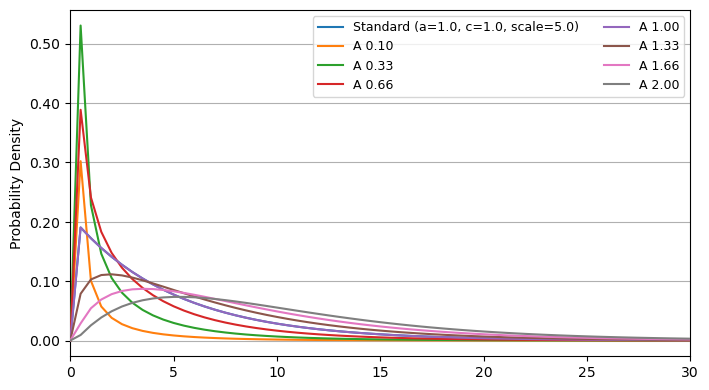

In [11]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
cCnt = 0
startZ = 20
newZ = startZ
stanpmf, = ax11.plot( bins, StanFixed2G.pdf( bins ), color=TabColorsKeys[cCnt], label="Standard (a=1.0, c=1.0, scale=5.0)",
                      linewidth=1.5, linestyle='-', zorder=startZ, )
for cCnt in range(1, len(AExamines)+1):
    newZ +- cCnt
    nxtpmf, = ax11.plot( bins, ListOFrozenA[cCnt-1].pdf( bins ), color=TabColorsKeys[cCnt],
                         label="A %4.2f" % AExamines[cCnt-1], linewidth=1.5, linestyle='-', 
                         zorder=newZ )
# end for
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [12]:
( StanFixed2G.cdf( 30.0 ), ListOFrozenA[0].cdf( 30.0 ), ListOFrozenA[1].cdf( 30.0 ), ListOFrozenA[2].cdf( 30.0 ), ListOFrozenA[3].cdf( 30.0 ), 
  ListOFrozenA[4].cdf( 30.0 ), ListOFrozenA[5].cdf( 30.0 ), ListOFrozenA[6].cdf( 30.0 ), )

(0.9973915523377184,
 0.9999513988058034,
 0.9997345544877893,
 0.9990083208382513,
 0.9973915523377184,
 0.9944754311336869,
 0.98962258534328,
 0.9818738971948053)

In [13]:
( StanFixed2G.cdf( 6.0 ), ListOFrozenA[0].cdf( 6.0 ), ListOFrozenA[1].cdf( 6.0 ), ListOFrozenA[2].cdf( 6.0 ), ListOFrozenA[3].cdf( 6.0 ), 
  ListOFrozenA[4].cdf( 6.0 ), ListOFrozenA[5].cdf( 6.0 ), ListOFrozenA[6].cdf( 6.0 ), )

(0.6830464354803971,
 0.9809051335084533,
 0.9234065186614007,
 0.8143770949390994,
 0.6830464354803971,
 0.5519859331563621,
 0.4291116807756052,
 0.3188667898473733)

## C shape parameter

In [14]:
CExamines = [ 0.10, 0.25, 0.50, 0.75, 1.25, 1.50]

In [15]:
ListOFrozenC = list()

In [16]:
for C in CExamines:
    ListOFrozenC.append( sstats.gengamma( Stan_A, C, loc=Stan_Loc, scale=Stan_Scale ) )
# end for

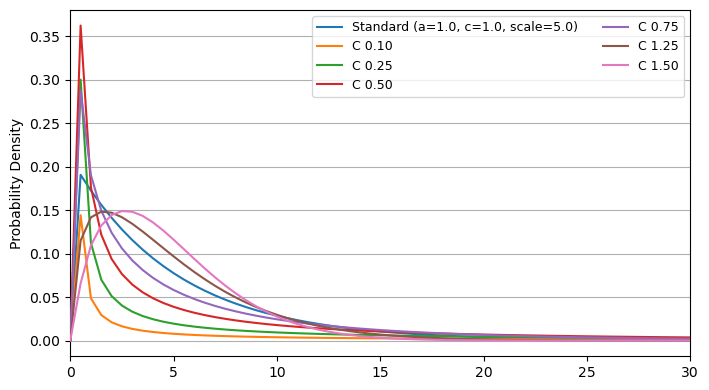

In [17]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
cCnt = 0
startZ = 20
newZ = startZ
stanpmf, = ax11.plot( bins, StanFixed2G.pdf( bins ), color=TabColorsKeys[cCnt], label="Standard (a=1.0, c=1.0, scale=5.0)",
                      linewidth=1.5, linestyle='-', zorder=startZ, )
for cCnt in range(1, len(CExamines)+1):
    newZ +- cCnt
    nxtpmf, = ax11.plot( bins, ListOFrozenC[cCnt-1].pdf( bins ), color=TabColorsKeys[cCnt],
                         label="C %4.2f" % CExamines[cCnt-1], linewidth=1.5, linestyle='-', 
                         zorder=newZ )
# end for
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [18]:
( StanFixed2G.cdf( 30.0 ), ListOFrozenC[0].cdf( 30.0 ), ListOFrozenC[1].cdf( 30.0 ), ListOFrozenC[2].cdf( 30.0 ), ListOFrozenC[3].cdf( 30.0 ), 
  ListOFrozenC[4].cdf( 30.0 ), ListOFrozenC[5].cdf( 30.0 ), )

(0.9973915523377184,
 0.697359755878749,
 0.790230951282592,
 0.9127569340928477,
 0.9778339400775883,
 0.9999077344360712,
 0.9999995006463389)

In [19]:
( StanFixed2G.cdf( 6.0 ), ListOFrozenC[0].cdf( 6.0 ), ListOFrozenC[1].cdf( 6.0 ), ListOFrozenC[2].cdf( 6.0 ), ListOFrozenC[3].cdf( 6.0 ), 
  ListOFrozenC[4].cdf( 6.0 ), ListOFrozenC[5].cdf( 6.0 ), )

(0.6830464354803971,
 0.6372299450734766,
 0.6448918477128021,
 0.6576474331369876,
 0.6703711624791133,
 0.6956562564241482,
 0.7081832924981633)

## Scale

In [20]:
ScaleExamines = [ 1.0, 3.0, 8.0, 12.0, 15.0, ]

In [21]:
ListOFrozenScales = list()

In [22]:
for scale in ScaleExamines:
    ListOFrozenScales.append( sstats.gengamma( Stan_A, Stan_C, loc=Stan_Loc, scale=scale ) )
# end for

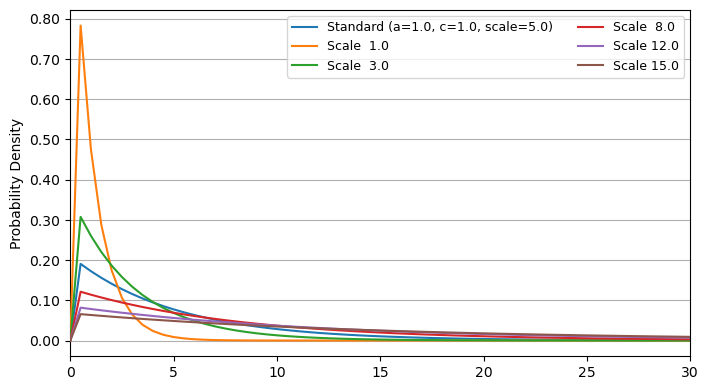

In [23]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
cCnt = 0
startZ = 20
newZ = startZ
stanpmf, = ax11.plot( bins, StanFixed2G.pdf( bins ), color=TabColorsKeys[cCnt], label="Standard (a=1.0, c=1.0, scale=5.0)",
                      linewidth=1.5, linestyle='-', zorder=startZ, )
for cCnt in range(1, len(ScaleExamines)+1):
    newZ +- cCnt
    nxtpmf, = ax11.plot( bins, ListOFrozenScales[cCnt-1].pdf( bins ), color=TabColorsKeys[cCnt],
                         label="Scale %4.1f" % ScaleExamines[cCnt-1], linewidth=1.5, linestyle='-', 
                         zorder=newZ )
# end for
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [24]:
( StanFixed2G.cdf( 30.0 ), ListOFrozenScales[0].cdf( 30.0 ), ListOFrozenScales[1].cdf( 30.0 ), ListOFrozenScales[2].cdf( 30.0 ), ListOFrozenScales[3].cdf( 30.0 ), 
  ListOFrozenScales[4].cdf( 30.0 ), )

(0.9973915523377184,
 0.9999999999998792,
 0.9999505723216406,
 0.9757205508391898,
 0.9161520299241501,
 0.8623443497103178)

In [25]:
( StanFixed2G.cdf( 6.0 ), ListOFrozenScales[0].cdf( 6.0 ), ListOFrozenScales[1].cdf( 6.0 ), ListOFrozenScales[2].cdf( 6.0 ), ListOFrozenScales[3].cdf( 6.0 ), 
  ListOFrozenScales[4].cdf( 6.0 ), )

(0.6830464354803971,
 0.9968012654483569,
 0.852658167413838,
 0.5123342274058906,
 0.38044264532808686,
 0.3181871007140094)

## Target Wet Depth Parameter Ranges

Find the target wet depth parameter ranges.

In [40]:
wdA_Min = 0.75
wdA_Max = 1.50
wdC_Min = 0.75
wdC_Max = 2.50
wdScale_Min = 5.0
wdScale_Max = 10.0

In [41]:
wdMinMinMinFroz = sstats.gengamma( wdA_Min, wdC_Min, loc=Stan_Loc, scale=wdScale_Min )
wdMaxMinMinFroz = sstats.gengamma( wdA_Max, wdC_Min, loc=Stan_Loc, scale=wdScale_Min )
wdMinMaxMinFroz = sstats.gengamma( wdA_Min, wdC_Max, loc=Stan_Loc, scale=wdScale_Min )
wdMaxMaxMinFroz = sstats.gengamma( wdA_Max, wdC_Max, loc=Stan_Loc, scale=wdScale_Min )
wdMinMinMaxFroz = sstats.gengamma( wdA_Min, wdC_Min, loc=Stan_Loc, scale=wdScale_Max )
wdMaxMinMaxFroz = sstats.gengamma( wdA_Max, wdC_Min, loc=Stan_Loc, scale=wdScale_Max )
wdMinMaxMaxFroz = sstats.gengamma( wdA_Min, wdC_Max, loc=Stan_Loc, scale=wdScale_Max )
wdMaxMaxMaxFroz = sstats.gengamma( wdA_Max, wdC_Max, loc=Stan_Loc, scale=wdScale_Max )

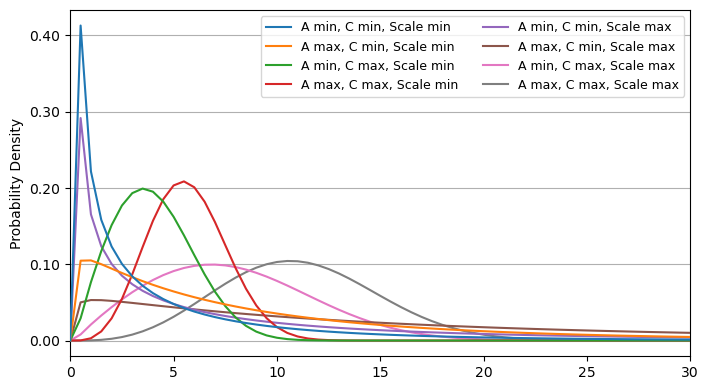

In [42]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
mnmnmn, = ax11.plot( bins, wdMinMinMinFroz.pdf( bins ), color=TabColorsKeys[0], label="A min, C min, Scale min",
                     linewidth=1.5, linestyle='-', zorder=20 )
mxmnmn, = ax11.plot( bins, wdMaxMinMinFroz.pdf( bins ), color=TabColorsKeys[1], label="A max, C min, Scale min",
                      linewidth=1.5, linestyle='-', zorder=18 )
mnmxmn, = ax11.plot( bins, wdMinMaxMinFroz.pdf( bins ), color=TabColorsKeys[2], label="A min, C max, Scale min",
                      linewidth=1.5, linestyle='-', zorder=16 )
mxmxmn, = ax11.plot( bins, wdMaxMaxMinFroz.pdf( bins ), color=TabColorsKeys[3], label="A max, C max, Scale min",
                      linewidth=1.5, linestyle='-', zorder=14 )
mnmnmx, = ax11.plot( bins, wdMinMinMaxFroz.pdf( bins ), color=TabColorsKeys[4], label="A min, C min, Scale max",
                     linewidth=1.5, linestyle='-', zorder=12 )
mxmnmx, = ax11.plot( bins, wdMaxMinMaxFroz.pdf( bins ), color=TabColorsKeys[5], label="A max, C min, Scale max",
                      linewidth=1.5, linestyle='-', zorder=10 )
mnmxmx, = ax11.plot( bins, wdMinMaxMaxFroz.pdf( bins ), color=TabColorsKeys[6], label="A min, C max, Scale max",
                      linewidth=1.5, linestyle='-', zorder=8 )
mxmxmx, = ax11.plot( bins, wdMaxMaxMaxFroz.pdf( bins ), color=TabColorsKeys[7], label="A max, C max, Scale max",
                      linewidth=1.5, linestyle='-', zorder=6 )
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [43]:
( wdMinMinMinFroz.cdf( 30.0 ), wdMaxMinMinFroz.cdf( 30.0 ), wdMinMaxMinFroz.cdf( 30.0 ), wdMaxMaxMinFroz.cdf( 30.0 ), 
  wdMinMinMaxFroz.cdf( 30.0 ), wdMaxMinMaxFroz.cdf( 30.0 ), wdMinMaxMaxFroz.cdf( 30.0 ), wdMaxMaxMaxFroz.cdf( 30.0 ), )

(0.9877172871864072,
 0.945406623061287,
 1.0,
 1.0,
 0.9362359479106607,
 0.7903629800812895,
 0.9999999040282981,
 0.9999989265622807)

In [44]:
( wdMinMinMinFroz.cdf( 6.0 ), wdMaxMinMinFroz.cdf( 6.0 ), wdMinMaxMinFroz.cdf( 6.0 ), wdMaxMaxMinFroz.cdf( 6.0 ), 
  wdMinMinMaxFroz.cdf( 6.0 ), wdMaxMinMaxFroz.cdf( 6.0 ), wdMinMaxMaxFroz.cdf( 6.0 ), wdMaxMaxMaxFroz.cdf( 6.0 ), )

(0.7707918282428019,
 0.4718971873474913,
 0.83772200902049,
 0.5814611896940468,
 0.6119033763207229,
 0.27555553962820806,
 0.3467077141286823,
 0.08118072280052978)

In [45]:
wdMinMinMinFroz.stats( moments='mvsk' )

(array(4.49087674), array(43.9744493), array(3.62499574), array(21.63184433))

In [46]:
wdMaxMinMinFroz.stats( moments='mvsk' )

(array(9.98465101), array(114.81888464), array(2.52803145), array(10.44142473))

In [47]:
wdMinMaxMinFroz.stats( moments='mvsk' )

(array(4.06203531), array(3.64048396), array(0.46042397), array(-0.11386072))

In [48]:
wdMaxMaxMinFroz.stats( moments='mvsk' )

(array(5.68118264), array(3.46887713), array(0.25384834), array(-0.13170205))

In [49]:
wdMinMinMaxFroz.stats( moments='mvsk' )

(array(8.72675349), array(175.89779721), array(3.62499574), array(21.63184433))

In [50]:
wdMaxMinMaxFroz.stats( moments='mvsk' )

(array(19.71430202),
 array(459.27553855),
 array(2.52803145),
 array(10.44142473))

In [51]:
wdMinMaxMaxFroz.stats( moments='mvsk' )

(array(7.86907062), array(14.56193582), array(0.46042397), array(-0.11386072))

In [52]:
wdMaxMaxMaxFroz.stats( moments='mvsk' )

(array(11.10736528), array(13.87550854), array(0.25384834), array(-0.13170205))

In [53]:
( np.median( wdMinMinMinFroz.rvs( 1000 ) ), np.median( wdMaxMinMinFroz.rvs( 1000 ) ), np.median( wdMinMaxMinFroz.rvs( 1000 ) ), 
  np.median( wdMaxMaxMinFroz.rvs( 1000 ) ), np.median( wdMinMinMaxFroz.rvs( 1000 ) ), np.median( wdMaxMinMaxFroz.rvs( 1000 ) ), 
  np.median( wdMinMaxMaxFroz.rvs( 1000 ) ), np.median( wdMaxMaxMaxFroz.rvs( 1000 ) ), )

(2.276068224707554,
 6.755266342725513,
 3.936734524707168,
 5.649123287672148,
 4.543298711448323,
 12.306458676974692,
 7.434941456664786,
 11.242169988932744)